# Dimensionality Reduction 

Dimensionality reduction is about condensing the variability of a matrix $X$ with $n$ features to a matrix $\hat{X}$ with just $k$ features were usually $k$ is much smaller than $n$ ($k \ll n$). 

The following figure illustrates a data set in 3 dimensions and its projection (dimensionality reduction) into 2 dimensions:

![](./images/projection_image.jpg)


We begin the practical component of today's lecture by loading the necessary libraries:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Principal Component Analysis

Recall from the lecture material that Principal Component Analysis is a very powerful unsupervised method for *dimensionality reduction* of data.  It's easiest to visualize the concept of dimensionality reduction by looking at a two-dimensional dataset. Hence, let's create some random data with a bit of internal structure to illustrate the concepts:

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

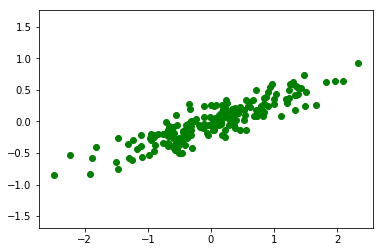

In [2]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'og')
plt.axis('equal')

We can see that there is a definite trend in the data. What PCA seeks to do is to find the **Principal Axes** of variation in the data (described as two vectors), and explain how important those axes are in describing the data distribution. 

We begin by carrying out PCA on the artificial data set created. We do that by importing the class `PCA` and instantiating an object of the class with a parameter `n_components` indicating the number of components we want to extract. In this interface, the argument `n_components` plays the role of $k$. Since this is a two-dimensional problem, we only have a total of 2 components, and just for illustration purposes we will look at both of them.

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

The computations to extract the principal components involes the calculation of the matrix $U_{reduced}$. We can now print out the percentage of variance explained by each one of the 2 components.

In [4]:
print(pca.explained_variance_ratio_)

[0.97634101 0.02365899]


You can see that the 1st component explains almost 97% of the variance in the data. The 2nd component on the other hand explains less than 2% of the variance in the data. **This means that we can condensate most of the information in the original data (which was using 2 features) into a projection that only uses one feature and still manages to capture 97% of the information contained in the original data.**

We can next print the coordinates of those 2 vectors (the 2 principal components of the data) 

In [5]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


To visualize how these 2 components relate to the variability of the data, let's plot the vector components on top of the scatter plot data. Don't worry about the specifics of the code, focus instead on the figure.

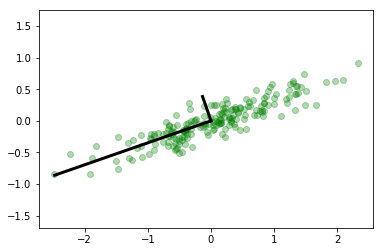

In [6]:
plt.plot(X[:, 0], X[:, 1], 'og', alpha=0.3)
plt.axis('equal')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)

Notice that one direction is very important (contains most of the variance in the data), while the other direction is not (contains very little variance).  This shows that the second principal component could be **completely ignored** without much loss of information! Let's see what our data look like if we only keep 97% of the variance:

In [7]:
clf = PCA(1) # project the original 2 Dimensional data in X into just 1 dimension
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


The original feature matrix, $X$ containing 2 features has been reduced to a feature matrix, $X_{trans}$, containing just one feature. By specifying that we want to throw away 3% of the variance, the data is now compressed by a factor of 50%! Let's see what the data looks like after this compression with a strong green color. For reference purposes, we also plot the original data in a slightly translucent manner. In this way, you can visualize how principal component analysis is just a projection of the data points into the principle component vector (axis) that still manages to capture most of the variance in the data:

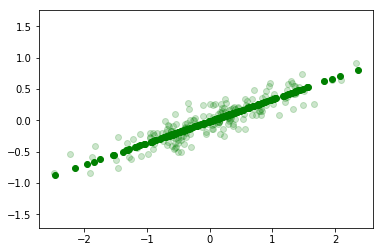

In [8]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'og', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'og', alpha=1)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.  We see that after truncating 3% of the variance of this dataset and then reprojecting it, the "most important" features of the data are maintained, and we've compressed the data by 50%!

# PCA on digits data set

Let's now turn our attention to a much harder problem. We are going to reduce the dimensionality of a machine vision problem by working on the digits data set. We begin by importing the digits data set using the following code:

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

Keep in mind that the digits data set we will be using consists of hand written digits. We can visualize the first 5 instances in the data set for you to not lose sight of the data you are working with.

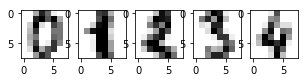

In [10]:
plt.rc("image", cmap="binary")  # this sets a black on white colormap
for i in range(0,5):
    plt.subplot(1, 6, 2 + i)
    plt.imshow(X[i,:].reshape(8, 8))

We are now going to reduce the dimensionality of the data from the original 64 dimensions (8x8 pixels images) to just 3 dimensions. Think about that for a moment, we're going to compress the information contained in 64 columns of the feature matrix $X$ into just 3 columns!!!!

In [12]:
pca = PCA(3)  # project from 64 to just 3 dimensions!!!!
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 3)


Let's now plot how the original data (images of digits from 0 to 9 stored in 64 dimensional vectors) looks in this compressed feature space containing just 3 dimensions.

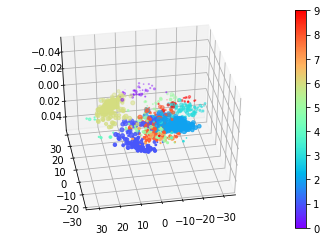

In [13]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
plt.rc("image", cmap="rainbow") 
ax = fig.add_subplot(111, projection='3d')
ax.view_init(220,100) #Coordinates of the viewpoint
plt.scatter(Xproj[:, 0], Xproj[:, 1], Xproj[:, 2], c=y)
plt.colorbar();

Can you see the clusters circles with the same color in the plot? Those are instances of the same digits contained in 3 dimensions rather than the original 64. The fact that they cluster together means that there is still a bit of structure in just 3 dimensions that could help to make the data separable by a classification algorithm working only in this new three-dimensional representation of the data (instead of the original 64 dimensional). You can change the parameters to the `view_init` method to change the angle from which you visualize the data. Hopefully, this figure has given you an idea of the relationship between the digits. 

Next, let's compare the performance  of a simple logistic regression classification model on the original data and on the projected data.

In [14]:
from sklearn.linear_model import LogisticRegression

cutPoint = int(len(X)/2) #Find out the midpoint in the data set

#as usual split the data into a training set and they set, do that for the original data set and for the projected data set
X_train = X[:cutPoint]
y_train = y[:cutPoint]
X_test = X[cutPoint:]
y_test = y[cutPoint:]
Xproj_train = Xproj[:cutPoint] 
Xproj_test = Xproj[cutPoint:]

#Create logistic regression model with the original data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Create a logistic regression model with the projected data (obtained from PCA)
logregproj = LogisticRegression()
logregproj.fit(Xproj_train, y_train)

print("Accuracy on test set using original 64 dimensional data:", logreg.score(X_test, y_test))
print("Accuracy on test set using projected data into just 3 dimensions:", logregproj.score(Xproj_test, y_test))

Accuracy on test set using original 64 dimensional data: 0.9165739710789766
Accuracy on test set using projected data into just 3 dimensions: 0.6540600667408232


As you can see, using the original data in 64 dimensions we get a 91% classification accuracy. Using the projected data in only 3 dimensions we get a classification accuracy of only 65%. Can we quantify how much information have we thrown away?  We can figure this out by looking at the variance as a function of the number of components kept:

Text(0,0.5,'cumulative explained variance')

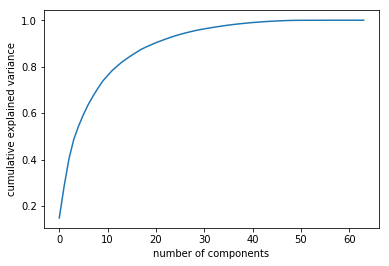

In [15]:
pca = PCA(64).fit(X)
#plt.semilogx(np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Here we see that our three-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance (still 20 components is better than 64 dimensions).  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple features.

As an exercise, you might want to to compute a projection of the data using 10 principal components instead of 3 as before. You should observed a marked improvement in the accuracy of a logistic regression model trained on this version of the projected data. That is, you will get an 88% classification accuracy using only 10 dimensions of a data set which originally contained 64 dimensions. If you use 20 principal components, you will get 91% classification accuracy, the same accuracy as if you use the original 64 dimensions (but using only one third of the storage required by the original data).

## Advanced example 
This example is not mandatory, it's included here only to show some advance performance of PCA. Focus on the visualizations and the classification accuracy, not on the specific code.

Let's download a data set of images of faces of famous people, we will focus on several instances of images of faces belonging to 7 famous politicians (George W Bush, Hugo Chavez, Tony Blair, etc). The data will be stored in the variable `lfw_people`.

In [16]:
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import RandomizedPCA
from sklearn.svm import SVC


print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


###############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

###############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
print("Size of X_train: %d" % len(X_train))
print("Size of X_test: %d" % len(X_test))

2019-02-11 15:35:20,721 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976012


Automatically created module for IPython interactive environment


2019-02-11 15:35:24,899 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976009
2019-02-11 15:35:27,687 Downloading LFW metadata: https://ndownloader.figshare.com/files/5976006
2019-02-11 15:35:31,041 Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976015


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Size of X_train: 966
Size of X_test: 322


Let's visualize some of the data on the test set $X_{test}$ so you get a feeling for what sort of data we are working with.

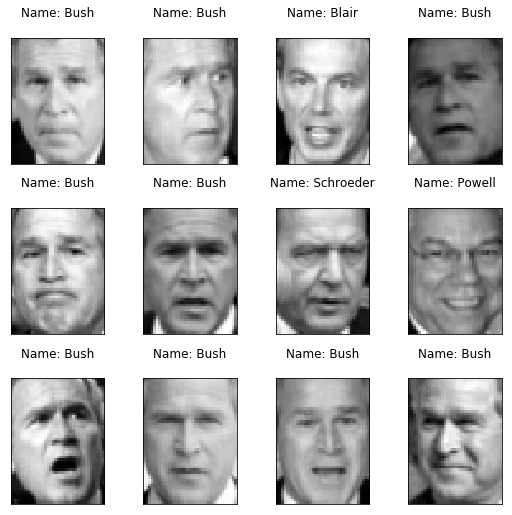

In [17]:
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


def title(y_pred, y_test, target_names, i):
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'Name: %s\n' % (true_name)

prediction_titles = [title(y_test, y_test, target_names, i)
                     for i in range(y_test.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

Let's use a support vector machine classifier to create a model of the training data. This computation should take  around 3 minutes. This is due to the fact that we are using 966 instances of 1850 dimensions (pixels in this case) each.

In [18]:
###############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 249.679s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Let's not test the classification accuracy of our computed model on the test set:

In [19]:
print(clf.score(X_test,y_test))

0.453416149068323


45% accuracy on the classification of faces belonging to 7 different people is not bad but is not great either. Let's see how PCA can help us boost performance by reducing the dimensionality of the data and hence avoiding the curse of dimensionality for this particular problem. 

In this case we are going to use PCA to reduce the 966 faces in the training data set $X_{train}$ to the 150 components of maximum variance present in those 966 faces. Those principal components are referred to as eigenfaces. Combinations of those 150 eigenface can return images that very much resemble the original images.

In [20]:
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


Extracting the top 150 eigenfaces from 966 faces
done in 0.348s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.032s


Let's see how the top 12 Eigenfaces look like:

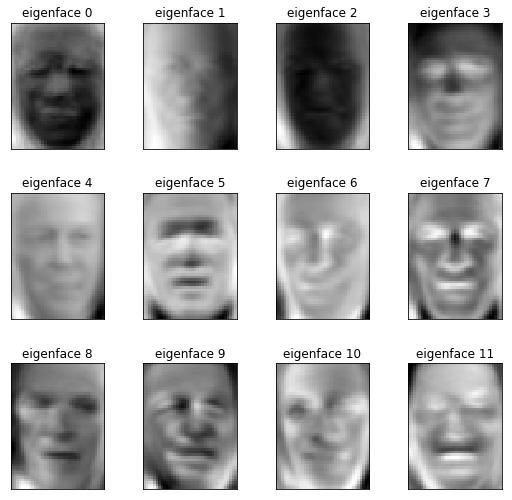

In [21]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

Let's also study how much variance of the original data this eigenfaces contain:

Text(0,0.5,'cumulative explained variance')

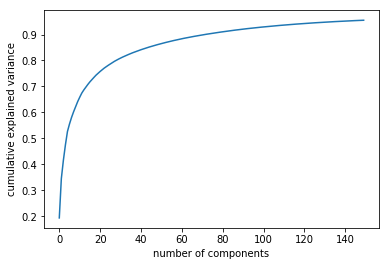

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

So the first 150 eigenfaces contain more than 90% of the variance present in the original 966 faces of the training set $X_{train}$. A question emerges, how would an SVM classification model perform in the transformed data set of eigenfaces, with its vast reduced dimensionality? Would we be able to evade the curse of dimensionality and improve the classification accuracy for this problem? Let's see:

In [23]:
# Train a SVM classification model of the transformed data in the reduced dimensionality
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 17.800s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Notice that due to the reduced dimensionality of the problem, the computational time required to estimate the model has been vastly reduced from 3 minutes to just a few seconds. Let's now test the performance of this model trained on the eigenfaces.

In [24]:
print(clf.score(X_test_pca,y_test))

0.8322981366459627


Not bad at all! 83% classification accuracy on the projected data is a vast improvement over the 45% classification accuracy achieved on the original data set.

A visualization of the performance of our model trained on the transformed data set (eigenfaces) and tested on the original test set projected into is eigenfaces is provided below:

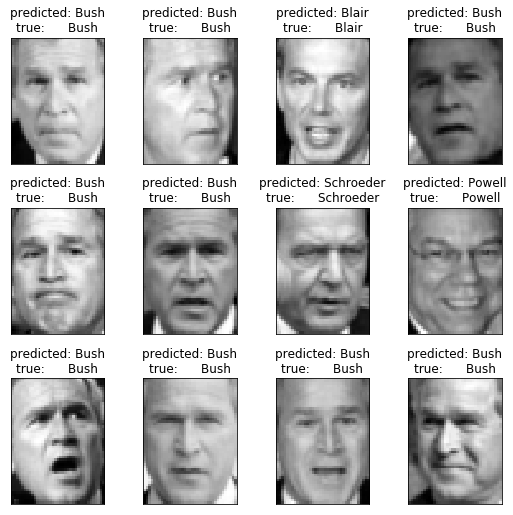

In [25]:
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)


y_pred=clf.predict(X_test_pca)
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)
